In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, f1_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import pickle

In [10]:
df = pd.read_csv("heart.csv")

X = df.drop('output', axis=1)  # Features
y = df['output']               # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [11]:
#gnb_model = pickle.load(open("gnb_model.pkl", 'rb'))
gradient_boosting_model = pickle.load(open("gradient_boosting_model.pkl", 'rb'))
logistic_regression_model = pickle.load(open("logistic_regression_model.pkl", 'rb'))
svm_model = pickle.load(open("svm_model.pkl", 'rb'))

models = {
    #"Gaussian Naive Bayes": gnb_model,
    "Gradient Boosting": gradient_boosting_model,
    "Logistic Regression": logistic_regression_model,
    "SVM": svm_model
}

Gradient Boosting - F1 Score: 0.7671232876712328, AUC: 0.8383620689655172


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


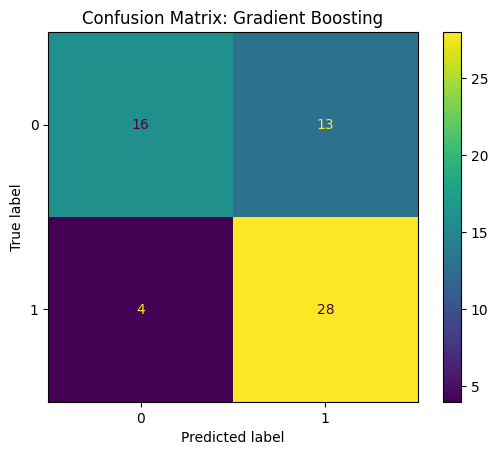

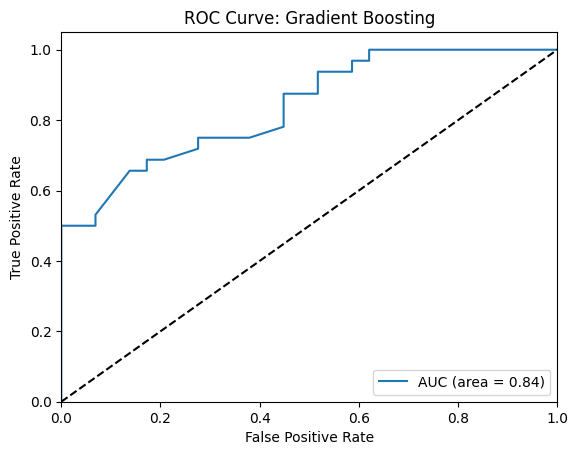

Logistic Regression - F1 Score: 0.8253968253968254, AUC: 0.896551724137931


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


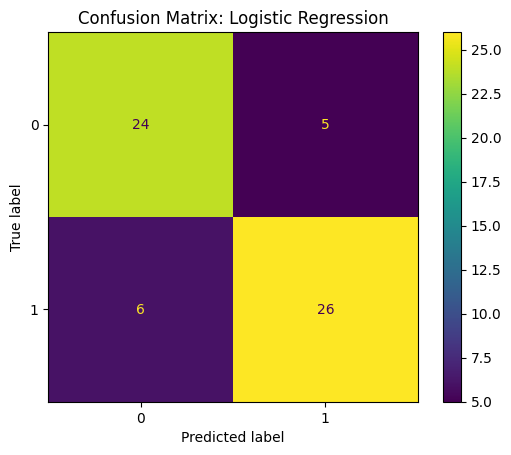

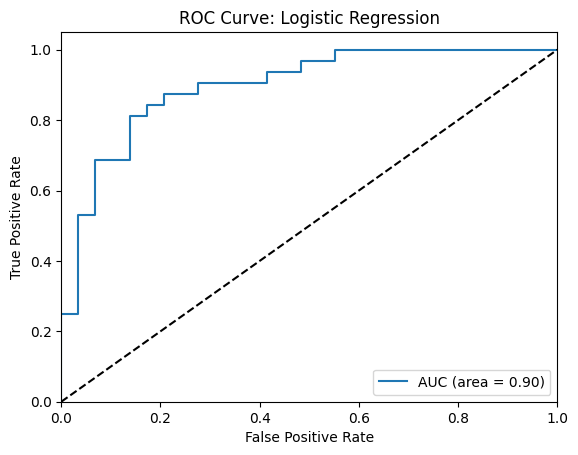

SVM - F1 Score: 0.6881720430107527, AUC: 0.7349137931034482


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


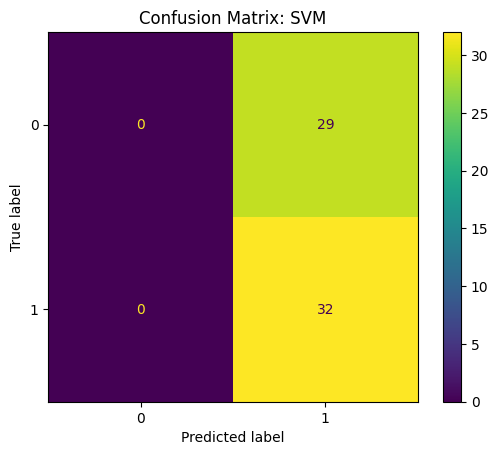

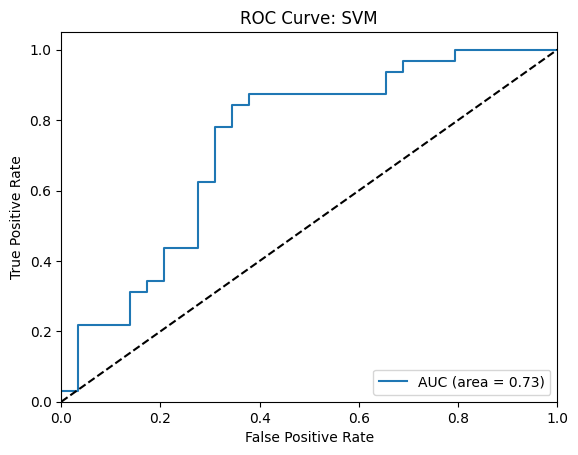

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Define a function to evaluate and plot for each model
def evaluate_model(model, X_test, y_test, model_name):
    # Predict on the test data
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate F1 score and AUC
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"{model_name} - F1 Score: {f1}, AUC: {auc}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return y_pred

# Evaluate each model
#evaluate_model(gnb_model, X_test_scaled, y_test, "Gaussian Naive Bayes")
gbm_ypred = evaluate_model(gradient_boosting_model, X_test_scaled, y_test, "Gradient Boosting")
lr_ypred = evaluate_model(logistic_regression_model, X_test_scaled, y_test, "Logistic Regression")
svm_ypred = evaluate_model(svm_model, X_test_scaled, y_test, "SVM")


In [14]:
def majority_vote(*predictions):
    """
    Takes multiple arrays of predictions and returns an array of final predictions
    based on majority vote.
    """
    # Stack predictions for easy column-wise comparison
    prediction_matrix = np.column_stack(predictions)

    # Apply majority vote logic
    majority_vote_predictions = np.apply_along_axis(
        lambda x: np.argmax(np.bincount(x)), axis=1, arr=prediction_matrix
    )

    return majority_vote_predictions

# Example usage with your models' predictions
final_predictions = majority_vote(gbm_ypred, lr_ypred, svm_ypred)

Final Ensemble - F1 Score: 0.8
Final Ensemble - AUC: 0.7446120689655172


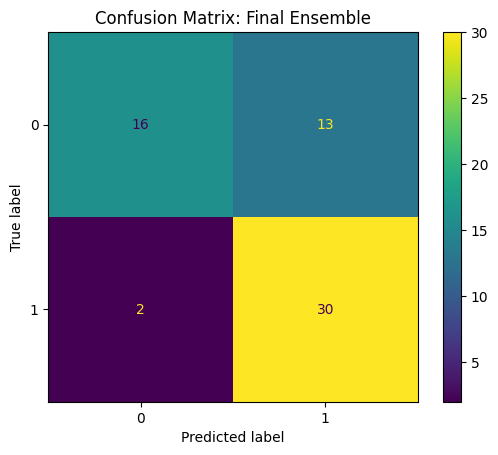

In [15]:
print("Final Ensemble - F1 Score:", f1_score(y_test, final_predictions))
print("Final Ensemble - AUC:", roc_auc_score(y_test, final_predictions))

# Plot the confusion matrix for the final ensemble
cm = confusion_matrix(y_test, final_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix: Final Ensemble')
plt.show()